# ECBM 4040 Fall 2020 FINAL PROJECT 

### Author:

Wenjun Yang (wy2347)   

Qihang Yang (qy2231)

In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# You do not need to run this
import sys
sys.path.append("/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages")
sys.path

['/home/ecbm4040/E4040/Project/ECBM4040-Final-Project',
 '/home/ecbm4040/anaconda3/lib/python37.zip',
 '/home/ecbm4040/anaconda3/lib/python3.7',
 '/home/ecbm4040/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/ecbm4040/anaconda3/lib/python3.7/site-packages',
 '/home/ecbm4040/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/ecbm4040/.ipython',
 '/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages']

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
from prep import *
from model import *

### Step 1: Extract the midi data from zip file.

* the data we use in this project comes from [Classical Piano Midi Page](http://www.piano-midi.de/) 
* all of them are midi file containing two tracks of piano for left hand and right hand


In [ ]:
## you don't have to run this block

# import zipfile
# with zipfile.ZipFile('data/midifile.zip', 'r') as zip_ref:
#     zip_ref.extractall('data/')

### Step 2: Prepare your data for training

#### A little insight about the input data structure
The input data proposed by the original paper is a little bit complex and requires some knowledge about music. \
For more information on background knowledge of music, you can refer to the following two links:
* [MIDI_events](https://www.mixagesoftware.com/en/midikit/help/HTML/midi_events.html#:~:text=The%20Note%20Off%20Event%20is,hard%20the%20key%20was%20released.) 
* [MIDI Turtorial](http://www.music-software-development.com/midi-tutorial.html) 

We spend quite a lot time trying to figure out the whole logic behind this and provide the following glossary table for your information.\
And for consistency, we will stick to the name convention stated in the original paper.

* stateMatrix: matrix of state, for state definition see below
* note: 0-77 lower_bound=24; upper_bound=102 
* part_position(1) = note
* pitchclass = 1 of 12 half steps CDEFGAB b#
* part_pitchclass(12): one-hot pitchclass 
* state: (1,0) (1,1) (0,0) -> denoting holding or repeating a note
* context: the count of each pitchclass played in last timestep 
* part_context(12): rearranged context
* part_prev_vicinity(50):

#### Note:
* input for model: part_position + part_pitchclass + part_prev_vicinity + part_context + beat + [0] 
* total number of arguments: 1 + 12 + 50 + 12 + 4 + 1 = 80
* for each of the 78 note you have 80 arguments in above structure
* and we only use sequences of 128 timesteps for training
* so the input data form will be 128 X 78 X 80

Please refer to prep.py for the details of implementation of data preprocessing part.

The general data preparation process is as the following flowchart:
<img src="image/Data Prep.png" />


In [7]:
training_data = load_data('data/music')

load liz_et2
load scn16_3
load haydn_43_1
load mendel_op30_3
load beethoven_les_adieux_1
load br_rhap
load grieg_zwerge
load haydn_7_1
load muss_8
load schu_143_2
load muss_4
load scn68_12
load clementi_opus36_1_1
load waldstein_3
load liz_et_trans5
load ty_maerz
load ty_juli
load rac_op3_2
load chpn-p3
load gra_esp_4
load scn15_5
load beethoven_opus10_2
load grieg_wedding
load mz_330_1
load haydn_35_2
load chpn_op27_1
load schubert_D935_3
load mendel_op19_4
load schub_d960_1
load haydn_9_1
load mz_545_1
load rac_op33_6
load liz_rhap15
load alb_esp2
load grieg_berceuse
load rac_op23_2
load bach_850
load beethoven_opus22_1
load burg_quelle
load debussy_cc_4
load schubert_D850_4
load chpn-p4
load mendel_op30_1
load pathetique_3
load clementi_opus36_6_1
load mendel_op62_3
load schu_143_1
load chpn_op25_e11
load scn15_4
load schub_d960_4
load mz_570_3
load clementi_opus36_5_1
load scn15_13
load grieg_waechter
load chpn-p8
load brahms_opus1_2
load rac_op32_1
load liz_et_trans4
load haydn_8_

### (Optional) Step 3: Train the theano-based model

In [5]:
# from Original.ori_prep import *
# from Original.ori_multi_training import *
# from Original.ori_model import *

In [6]:
# pcs = loadPieces("data/music")

# m = Model([300,300],[100,50], dropout=0.5)

Loaded liz_et2
Loaded scn16_3
Loaded haydn_43_1
Loaded mendel_op30_3
Loaded beethoven_les_adieux_1
Loaded br_rhap
Loaded grieg_zwerge
Loaded haydn_7_1
Loaded muss_8
Loaded schu_143_2
Loaded muss_4
Loaded scn68_12
Loaded clementi_opus36_1_1
Loaded waldstein_3
Loaded liz_et_trans5
Loaded ty_maerz
Loaded ty_juli
Loaded rac_op3_2
Loaded chpn-p3
Loaded gra_esp_4
Loaded scn15_5
Loaded beethoven_opus10_2
Loaded grieg_wedding
Loaded mz_330_1
Loaded haydn_35_2
Loaded chpn_op27_1
Loaded schubert_D935_3
Loaded mendel_op19_4
Loaded schub_d960_1
Loaded haydn_9_1
Loaded mz_545_1
Loaded rac_op33_6
Loaded liz_rhap15
Loaded alb_esp2
Loaded grieg_berceuse
Loaded rac_op23_2
Loaded bach_850
Loaded beethoven_opus22_1
Loaded burg_quelle
Loaded debussy_cc_4
Loaded schubert_D850_4
Loaded chpn-p4
Loaded mendel_op30_1
Loaded pathetique_3
Loaded clementi_opus36_6_1
Loaded mendel_op62_3
Loaded schu_143_1
Loaded chpn_op25_e11
Loaded scn15_4
Loaded schub_d960_4
Loaded mz_570_3
Loaded clementi_opus36_5_1
Loaded scn1

INFO (theano.gof.compilelock): Waiting for existing lock by process '2762' (I am process '7173')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ecbm4040/.theano/compiledir_Linux-5.4--gcp-x86_64-with-debian-buster-sid-x86_64-3.7.6-64/lock_dir
/home/ecbm4040/E4040/Project/ECBM4040-Final-Project/Original/ori_model.py:380: UserWarning: Updating an `OrderedUpdates` with a non-ordered dictionary with 2+ elements could make your code non-deterministic
  self.walk_input: next_input
/home/ecbm4040/E4040/Project/ECBM4040-Final-Project/Original/ori_model.py:383: UserWarning: Updating an `OrderedUpdates` with a non-ordered dictionary with 2+ elements could make your code non-deterministic
  updates.update({hidden:newstate for hidden, newstate, layer in zip(self.walk_hiddens, new_states, self.time_model.layers) if has_hidden(layer)})


In [ ]:
# Out of memory
# trainPiece(m, pcs, 100) 

### Step 4: Train our model

description

* flowchart

Try #2

In [8]:
model = music_gen()

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(5e-5),loss= my_loss)

In [11]:
model.build(input_shape = (None, 127, 78, 82)) # Training shape
# model.summary()
filepath="models/model-epoch-{epoch:02d}.h5"
save_callback=tf.keras.callbacks.ModelCheckpoint(filepath,  
                                              verbose=0, save_best_only=False, 
                                              save_weights_only=True, period=50)

In [12]:
data_gen=update_input_batch_generator(training_data)
model.fit_generator(data_gen,epochs=10,steps_per_epoch=20,callbacks=[save_callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 39s 2s/step - loss: 256.2800
Epoch 2/10
20/20 [==============================] - 42s 2s/step - loss: 162.4976
Epoch 3/10
20/20 [==============================] - 40s 2s/step - loss: 142.0483
Epoch 4/10
20/20 [==============================] - 40s 2s/step - loss: 150.6520
Epoch 5/10
20/20 [==============================] - 42s 2s/step - loss: 145.4117
Epoch 6/10
20/20 [==============================] - 40s 2s/step - loss: 142.9249
Epoch 7/10
20/20 [==============================] - 40s 2s/step - loss: 150.3253
Epoch 8/10
20/20 [==============================] - 42s 2s/step - loss: 136.0461
Epoch 9/10
20/20 [==============================] - 40s 2s/step - loss: 144.8250
Epoch 10/10
20/20 [==============================] - 40s 2s/step - loss: 141.8763


In [13]:
# Parameters:
# # starting_data: randomly choose a starting_data from training_data
# # length: the length of music to be composed,
# # name: file name

starting_data = build_single_input(training_data) 

model.compose(starting_data, length = 100, name = "sample")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample.mid saved


midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[50, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[52, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[57, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[64, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[65, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[71, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[73, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[75, 40]),
   midi.NoteOffEvent(tick=55, channel=0, data=[50, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[52, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[57, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[64, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[65, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[70, 40]),
   midi.NoteOffEvent(tick=0, channel=0, data=[71, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[73, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[75, 0]),
  

# ------------------------

In [37]:
def generate_music(model_epoch_num=600,prob=0.5,length=100):
    model_epoch=music_gen()
    model_epoch.build(input_shape = (None, 127, 78, 82)) 
    model_epoch.load_weights("model/model-epoch-"+ str(model_epoch_num) +".h5")
    model_epoch.compose(training_data, length = 100, prob = prob, name = "sample_"+str(model_epoch_num)+"_"+str(prob).replace('.',''))

In [38]:
generate_music(600,prob=0.4)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample_600_04.mid saved


In [35]:
# 600 epoch model
model_epoch_600=music_gen()
model_epoch_600.compile(optimizer=tf.keras.optimizers.Adam(5e-5),loss= my_loss)
model_epoch_600.build(input_shape = (None, 127, 78, 82)) 
model_epoch_600.load_weights("model/model-epoch-600.h5")

In [36]:
model_epoch_600.compose(training_data, length = 100, prob = 0.5, name = "sample_600_050")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample_600_050.mid saved


midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[67, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[69, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[73, 40]),
   midi.NoteOffEvent(tick=55, channel=0, data=[67, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[73, 0]),
   midi.NoteOnEvent(tick=55, channel=0, data=[61, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[67, 40]),
   midi.NoteOnEvent(tick=55, channel=0, data=[57, 40]),
   midi.NoteOffEvent(tick=0, channel=0, data=[61, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[64, 40]),
   midi.NoteOffEvent(tick=0, channel=0, data=[67, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[69, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[72, 40]),
   midi.NoteOffEvent(tick=55, channel=0, data=[57, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[61, 40]),
   midi.NoteOffEvent(tick=0, channel=0, data=[64, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[64, 40]),

In [19]:
# 500 epoch model
model_epoch_500=music_gen()
model_epoch_500.compile(optimizer=tf.keras.optimizers.Adam(5e-5),loss= my_loss)
model_epoch_500.build(input_shape = (None, 127, 78, 82)) 
model_epoch_500.load_weights("model/model-epoch-500.h5")

model_epoch_500.compose(training_data, length = 100, prob = 0.3, name = "sample_500_030")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample_500_030.mid saved


midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[60, 60]),
   midi.NoteOnEvent(tick=0, channel=0, data=[67, 60]),
   midi.NoteOnEvent(tick=0, channel=0, data=[79, 60]),
   midi.NoteOffEvent(tick=55, channel=0, data=[79, 0]),
   midi.NoteOnEvent(tick=55, channel=0, data=[79, 60]),
   midi.NoteOnEvent(tick=55, channel=0, data=[55, 60]),
   midi.NoteOffEvent(tick=0, channel=0, data=[60, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[79, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[79, 60]),
   midi.NoteOnEvent(tick=55, channel=0, data=[59, 60]),
   midi.NoteOffEvent(tick=0, channel=0, data=[79, 0]),
   midi.NoteOffEvent(tick=55, channel=0, data=[59, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[65, 60]),
   midi.NoteOnEvent(tick=0, channel=0, data=[72, 60]),
   midi.NoteOnEvent(tick=55, channel=0, data=[70, 60]),
   midi.NoteOnEvent(tick=55, channel=0, data=[53, 60]),
   midi.NoteOnEvent(tick=0, channel=0, data=[60, 60

In [14]:
# 400 epoch model
model_epoch_400=music_gen()
# model_epoch_400.compile(optimizer=tf.keras.optimizers.Adam(5e-5),loss= my_loss)
model_epoch_400.build(input_shape = (None, 127, 78, 82)) 
model_epoch_400.load_weights("model/model-epoch-400.h5")

model_epoch_400.compose(training_data, length = 100, prob = 0.5, name = "sample_400_050")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[50, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[58, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[59, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[62, 40]),
   midi.NoteOffEvent(tick=55, channel=0, data=[58, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[58, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[61, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[70, 40]),
   midi.NoteOffEvent(tick=55, channel=0, data=[61, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[70, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[60, 40]),
   midi.NoteOnEvent(tick=55, channel=0, data=[70, 40]),
   midi.NoteOnEvent(tick=55, channel=0, data=[46, 40]),
   midi.NoteOffEvent(tick=55, channel=0, data=[58, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[70, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[58, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[70, 40])

# -------------------------------
# Former works

 Try probability change

In [51]:
model = music_gen()
model.build(input_shape = (None, 127, 78, 82)) 
model.load_weights("models/model-epoch-600.h5")

In [47]:
test_dt=build_single_input(training_data)
test_dt = tf.concat((np.asarray(test_dt[0][:-1]).reshape(1, 127, 78, 80), np.asarray(test_dt[1][:-1]).reshape(1, 127, 78, 2)), axis = -1)
test_pred = model.predict(test_dt)
test_pred

array([[[1.34141890e-11, 3.95871495e-11],
        [8.70974196e-11, 1.76311066e-11],
        [7.41917603e-08, 1.12454011e-08],
        [7.45971837e-15, 1.20240059e-12],
        [5.86378082e-12, 2.04926996e-11],
        [1.16276336e-10, 4.04018095e-12],
        [6.26931973e-09, 5.32982556e-12],
        [1.30986520e-15, 2.40847354e-13],
        [9.32094263e-11, 1.63182978e-08],
        [4.78781459e-08, 6.95463489e-13],
        [4.72281135e-06, 3.64561219e-14],
        [5.95052688e-11, 1.63250500e-16],
        [6.11347741e-06, 1.69593562e-07],
        [3.33753424e-12, 3.33774392e-16],
        [1.29047385e-05, 6.69570044e-09],
        [4.30623907e-13, 1.25984791e-12],
        [4.07534948e-08, 1.89739435e-12],
        [9.84431088e-01, 7.20782737e-06],
        [1.15258153e-07, 4.11505205e-12],
        [3.45836588e-06, 4.75094488e-08],
        [1.58916591e-04, 6.04166007e-06],
        [1.23078739e-02, 7.39381429e-13],
        [1.51859596e-04, 1.00075525e-12],
        [4.16387671e-08, 1.6971336

In [48]:
starting_data = build_single_input(training_data) 

In [52]:
model.compose(starting_data, length = 100, name = "sample_prob")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample_prob.mid saved


midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[56, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[76, 40]),
   midi.NoteOnEvent(tick=55, channel=0, data=[52, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[53, 40]),
   midi.NoteOffEvent(tick=0, channel=0, data=[76, 0]),
   midi.NoteOnEvent(tick=55, channel=0, data=[44, 40]),
   midi.NoteOnEvent(tick=55, channel=0, data=[50, 40]),
   midi.NoteOffEvent(tick=0, channel=0, data=[53, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[53, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[65, 40]),
   midi.NoteOnEvent(tick=0, channel=0, data=[68, 40]),
   midi.NoteOnEvent(tick=55, channel=0, data=[57, 40]),
   midi.NoteOffEvent(tick=0, channel=0, data=[65, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[68, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[72, 40]),
   midi.NoteOffEvent(tick=55, channel=0, data=[44, 0]),
   midi.NoteOffEvent(tick=0, channel=0, data=[53, 0])

(array([123.,   2.,   1.,   1.,   0.,   0.,   2.,   2.,   0.,   0.,   0.,
          2.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.0e+00, 1.0e-05, 2.0e-05, 3.0e-05, 4.0e-05, 5.0e-05, 6.0e-05,
        7.0e-05, 8.0e-05, 9.0e-05, 1.0e-04, 1.1e-04, 1.2e-04, 1.3e-04,
        1.4e-04, 1.5e-04, 1.6e-04, 1.7e-04, 1.8e-04, 1.9e-04, 2.0e-04,
        2.1e-04, 2.2e-04, 2.3e-04, 2.4e-04, 2.5e-04, 2.6e-04, 2.7e-04,
        2.8e-04, 2.9e-04, 3.0e-04,

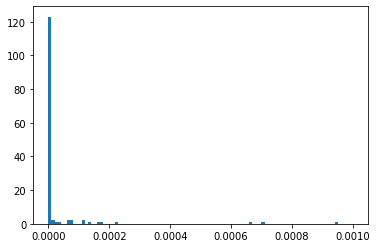

In [9]:
# Draw a probaility histogram
import matplotlib.pyplot as plt
probs = np.asarray(test_pred[0]).reshape(156)
plt.hist(probs, bins = 100, range = [0, 0.001])

# ------------------------------

In [6]:
# Unsolved Problem
############################################################
# 1. Is this generally the right architecture
# 2. Probably need change all the 128 into None? But this raises error
# 3. 'mask' function in original code, does Keras take care of that for us?
# 4. What is the target to validate model? The whole state sequence [batch,128,78,2] 
#                                          or the state of only the next timestep
# 5. The function to predict next note to play?
# 6. Way too many parameters in the last dense layer! Not quite sure it is what it should be

inputs = tf.keras.Input(shape=(127,78,80))

# For why use permute dimensions and use time distributed layers 
# please refer to https://keras.io/api/layers/recurrent_layers/time_distributed/

inputs_rotate= tf.keras.backend.permute_dimensions(inputs,(0,2,1,3)) #(batch,78,128,80)

time_lstm1 = tf.keras.layers.LSTM(300,return_sequences=True,dropout=0.5)
time_lstm2 = tf.keras.layers.LSTM(300,return_sequences=True,dropout=0.5)

inter1 = tf.keras.layers.TimeDistributed(time_lstm1)(inputs_rotate) #(batch,78,128,300)
inter2 = tf.keras.layers.TimeDistributed(time_lstm2)(inter1) #(batch,78,128,300)

note_lstm1 = tf.keras.layers.LSTM(100,return_sequences=True,dropout=0.5)
note_lstm2 = tf.keras.layers.LSTM(50,return_sequences=True,dropout=0.5)

inter2_rotate= tf.keras.backend.permute_dimensions(inter2,(0,2,1,3)) #(batch,128,78,300)

# the input of note-axis part of model will be 
# 1) the note-state vector from previous LSTM stack (batch,128,78,300)
# 2) where the previous note was chosen to be played (batch,128,78,1)
# 3) where the previous note was chosen to be articulated (batch,128,78,1)
# that's why we are using padding here and concatenate the 3 together 
# please see https://www.tensorflow.org/api_docs/python/tf/pad 
# https://www.tensorflow.org/api_docs/python/tf/concat
# for reference

state_inputs = tf.keras.Input(shape=(127,78,2))

paddings=[[0,0],[0,0],[1,0],[0,0]]

prev_note_state=tf.pad(state_inputs[:,:,:-1,:], paddings, 'CONSTANT', constant_values=0)   # (batch,128,78,2)

inter_input1=tf.concat((inter2_rotate,prev_note_state),axis=-1) # (batch,128,78,302)

inter3 = tf.keras.layers.TimeDistributed(note_lstm1)(inter_input1) #(batch,128,78,100)

inter_input2=tf.concat((inter3,prev_note_state),axis=-1) #(batch,128,78,102)

inter4 = tf.keras.layers.TimeDistributed(note_lstm2)(inter_input2) ##(batch,128,78,50)

outputs = tf.keras.layers.Flatten()(inter4)

outputs = tf.keras.layers.Dropout(.5)(outputs)

outputs = tf.keras.layers.Dense(156, activation='sigmoid')(outputs) #（batch,128,78,2）

# output the final result, i.e., probability of playing or articulating certain notes
outputs = tf.keras.layers.Reshape((78,2))(outputs) #（batch,78,2）

model=tf.keras.Model(inputs=[inputs,state_inputs],outputs=outputs)

In [7]:
# custom loss function
# the output of model is the same shape with the sample's state matrix
# that is (time,note(78),state(2))
# the 2 for each time and note denote the probability of the note being played or articulated repectively in the last step
# we use the negative log likelihood to denote the loss, the log function can avoid the numbers being too small

def my_loss(y_true, y_pred):
#     y_pred=np.asarray(y_pred)
#     y_true=np.asarray(y_true)
    loss=-tf.keras.backend.sum(tf.math.log(y_pred*y_true+(1-y_pred)*(1-y_true)+np.spacing(np.float32(1.0)))) # numeric stablity
    return loss

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(5e-5),loss= my_loss)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 127, 78, 80) 0                                            
__________________________________________________________________________________________________
tf_op_layer_Transpose (TensorFl [(None, 78, 127, 80) 0           input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, 78, 127, 300) 457200      tf_op_layer_Transpose[0][0]      
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 127, 78, 2)] 0                                            
______________________________________________________________________________________________

In [195]:
### new generator
def update_input_batch_generator(statemat_dict):
    
    # training data generator
    
    while True:
        batch=build_input_batch(statemat_dict)
        train = tf.concat([batch[0][:,:-1],batch[1][:,:-1]], axis = -1 )
        yield (train, batch[1][:,-1])

In [189]:
gen=update_input_batch_generator(training_data)
num=0
for i in gen:
    print(i[0].shape)
    print(i[1].shape)
    num=num+1
    if num>=2:
        break

(10, 127, 78, 82)
(10, 78, 2)
(10, 127, 78, 82)
(10, 78, 2)


In [27]:
data_gen=update_input_batch_generator(training_data)
model.fit_generator(data_gen,epochs=20,steps_per_epoch=20)

Epoch 1/20
20/20 [==============================] - 41s 2s/step - loss: 109.1683
Epoch 2/20
20/20 [==============================] - 39s 2s/step - loss: 110.9593
Epoch 3/20
20/20 [==============================] - 39s 2s/step - loss: 123.2253
Epoch 4/20
20/20 [==============================] - 41s 2s/step - loss: 106.8875
Epoch 5/20
20/20 [==============================] - 39s 2s/step - loss: 102.9845
Epoch 6/20
20/20 [==============================] - 39s 2s/step - loss: 120.6106
Epoch 7/20
11/20 [===============>..............] - ETA: 18s - loss: 96.4576

KeyboardInterrupt: 

# ----------------------------------------

In [78]:


def music_composition(model, starting_data, length):

    test_data = starting_data[:]
    new_input = [np.asarray(test_data[0][:-1]).reshape(1, 127, 78, 80),
                  np.asarray(test_data[1][:-1]).reshape(1, 127, 78, 2)] # [(1, 127, 78, 80), (1, 127, 78, 2)]
    
    output_state = []
          
    for _ in range(length):
         
        pred_state = model.predict(new_input) # Predict statematrix (1, 78, 2)
        
        for i in range(pred_state[0].shape[0]):
            for j in range(pred_state[0].shape[1]):
                if pred_state[0][i][j] > 0.25:
                    pred_state[0][i][j] = 1
                else:
                    pred_state[0][i][j] = 0

        
        output_state.append(pred_state[0])
        
        # Combine pred_state to test_state
        new_state = np.concatenate((np.asarray(new_input[1][0][1:]).reshape(1, 126, 78, 2), 
                                    np.asarray(pred_state).reshape(1, 1, 78, 2)), axis = 1) # (1, 127, 78, 2)

        new_data = np.asarray(build_input_data(new_state[0])).reshape(1, 127, 78, 80) # Starematrix -> Input_data (1, 127, 78, 80)
        new_input = [new_data, new_state] # [(1, 127, 78, 80), (1, 127, 78, 2)]

        
    return np.array(output_state)



In [79]:

# Select a starting data
starting_data = build_single_input(training_data) # [(1, 127, 78, 80), (1, 127, 78, 2)]

output_state = music_composition(model_20, starting_data, length = 100)

output_state.shape

(100, 78, 2)

In [80]:
output_state

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       ...,

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]], dtype=float32)

In [81]:
statematrix_to_midi(output_state)

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[42, 60]),
   midi.NoteOnEvent(tick=0, channel=0, data=[49, 60]),
   midi.NoteOnEvent(tick=0, channel=0, data=[52, 60]),
   midi.NoteOnEvent(tick=330, channel=0, data=[37, 60]),
   midi.NoteOnEvent(tick=55, channel=0, data=[57, 60]),
   midi.NoteOnEvent(tick=55, channel=0, data=[64, 60]),
   midi.NoteOffEvent(tick=55, channel=0, data=[64, 0]),
   midi.NoteOnEvent(tick=55, channel=0, data=[64, 60]),
   midi.NoteOnEvent(tick=220, channel=0, data=[40, 60]),
   midi.NoteOnEvent(tick=0, channel=0, data=[48, 60]),
   midi.NoteOffEvent(tick=55, channel=0, data=[48, 0]),
   midi.NoteOnEvent(tick=110, channel=0, data=[69, 60]),
   midi.NoteOnEvent(tick=275, channel=0, data=[44, 60]),
   midi.NoteOnEvent(tick=110, channel=0, data=[47, 60]),
   midi.NoteOffEvent(tick=55, channel=0, data=[47, 0]),
   midi.NoteOnEvent(tick=55, channel=0, data=[47, 60]),
   midi.NoteOffEvent(tick=55, channel=0, 

In [58]:
test_dt=build_single_input(training_data)
test_dt = [np.asarray(test_dt[0][:-1]).reshape(1, 127, 78, 80), \
                  np.asarray(test_dt[1][:-1]).reshape(1, 127, 78, 2)]
test_pred = model.predict(test_dt)


In [59]:
test_pred

array([[[2.13447674e-05, 3.33141179e-06],
        [2.85910555e-05, 1.61102810e-06],
        [1.14372451e-05, 1.71526221e-06],
        [9.07939193e-06, 2.31358649e-06],
        [3.45558037e-05, 1.60782929e-06],
        [4.92890598e-04, 7.97427583e-06],
        [6.59059221e-03, 1.20087920e-04],
        [1.21153775e-03, 1.77290294e-05],
        [5.57307899e-03, 2.22813214e-05],
        [9.90594490e-05, 2.41834982e-06],
        [3.27689992e-03, 2.65911749e-05],
        [1.33357281e-02, 4.64830100e-06],
        [3.13579105e-03, 1.41584067e-04],
        [8.40216968e-03, 1.32070463e-02],
        [3.59997526e-03, 4.41489770e-04],
        [2.51671323e-03, 4.02670048e-05],
        [5.53600788e-02, 8.26758151e-06],
        [1.75525015e-03, 6.67826607e-05],
        [4.72218990e-02, 9.96029703e-04],
        [4.15141806e-02, 4.13033785e-03],
        [4.57139947e-02, 9.83341131e-04],
        [9.82572604e-03, 8.26598553e-05],
        [4.09033196e-03, 2.70972698e-04],
        [2.43507195e-02, 1.5296326

In [60]:
for i in range(test_pred[0].shape[0]):
    for j in range(test_pred[0].shape[1]):
        if test_pred[0][i][j] > 1e-1:
            test_pred[0][i][j] = 1
        else:
            test_pred[0][i][j] = 0

In [61]:
test_pred[0]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [104]:
test_data = build_input_data(test_state)
np.array(test_data[-1]).shape

(78, 80)

In [49]:
np.asarray(test_dt[0][:-1]).shape, np.asarray(test_dt[1][:-1]).shape

((127, 78, 80), (127, 78, 2))

In [51]:
test_dt1 = np.asarray(test_dt[0][:-1]).reshape(1, 127, 78, 80)
test_dt2 = np.asarray(test_dt[1][:-1]).reshape(1, 127, 78, 2)
test_input = [test_dt1, test_dt2]

In [55]:
model.input_shape, model.output_shape

([(None, 127, 78, 80), (None, 127, 78, 2)], (None, 78, 2))

In [52]:
test_pred=model.predict(test_input)
test_pred

array([[[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],


In [21]:
np.sum(np.square(test_pred.reshape(128,78,2)-np.asarray(test_dt[1])))

418.4551392232534

In [22]:
out=statematrix_to_midi(test_pred.reshape(128,78,2))

* Tensorboard

### Step 5: Difference in outcome

### Step 6: Compare between the models (Discussion: The advantage of biaxial LSTM)

Time-axis Model

In [34]:
t_inputs = tf.keras.Input(shape=(128,78,80))

t_inputs_rotate= tf.keras.backend.permute_dimensions(t_inputs,(0,2,1,3)) #(78,128,80)

t_time_lstm1 = tf.keras.layers.LSTM(300,return_sequences=True)
t_time_lstm2 = tf.keras.layers.LSTM(300,return_sequences=True)

t_inter1 = tf.keras.layers.TimeDistributed(t_time_lstm1)(t_inputs_rotate) #(78,128,80)
t_inter2 = tf.keras.layers.TimeDistributed(t_time_lstm2)(t_inter1) #(78,128,80)

t_inter2_rotate= tf.keras.backend.permute_dimensions(t_inter2,(0,2,1,3)) #(128,78,80)
t_outputs = tf.keras.layers.Dense(2,activation='sigmoid')(t_inter2_rotate) #(128,78,2)

time_model=tf.keras.Model(inputs=t_inputs,outputs=t_outputs)

In [35]:
time_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 78, 80)]     0         
_________________________________________________________________
tf_op_layer_Transpose_5 (Ten [(None, 78, 128, 80)]     0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, 78, 128, 300)      457200    
_________________________________________________________________
time_distributed_10 (TimeDis (None, 78, 128, 300)      721200    
_________________________________________________________________
tf_op_layer_Transpose_6 (Ten [(None, 128, 78, 300)]    0         
_________________________________________________________________
dense_3 (Dense)              (None, 128, 78, 2)        602       
Total params: 1,179,002
Trainable params: 1,179,002
Non-trainable params: 0
_________________________________________________

In [36]:
time_model.compile(optimizer=tf.keras.optimizers.Adam(),loss=my_loss)

In [37]:
data_gen=input_batch_generator(training_data)
time_model.fit_generator(data_gen,epochs=10,steps_per_epoch=20)

Epoch 1/10
20/20 [==============================] - 33s 2s/step - loss: 0.1755
Epoch 2/10
20/20 [==============================] - 36s 2s/step - loss: 0.1216
Epoch 3/10
20/20 [==============================] - 33s 2s/step - loss: 0.1123
Epoch 4/10
20/20 [==============================] - 34s 2s/step - loss: 0.1003
Epoch 5/10
20/20 [==============================] - 36s 2s/step - loss: 0.0860
Epoch 6/10
20/20 [==============================] - 33s 2s/step - loss: 0.0690
Epoch 7/10
20/20 [==============================] - 34s 2s/step - loss: 0.0459
Epoch 8/10
20/20 [==============================] - 37s 2s/step - loss: 0.0285
Epoch 9/10
20/20 [==============================] - 32s 2s/step - loss: 0.0143
Epoch 10/10
20/20 [==============================] - 32s 2s/step - loss: 0.0102


Note_axis Model

In [46]:
n_inputs = tf.keras.Input(shape=(128,78,80))

n_note_lstm1 = tf.keras.layers.LSTM(100,return_sequences=True)
n_note_lstm2 = tf.keras.layers.LSTM(50,return_sequences=True)

n_inter3 = tf.keras.layers.TimeDistributed(n_note_lstm1)(n_inputs)
n_inter4 = tf.keras.layers.TimeDistributed(n_note_lstm2)(n_inter3)

n_outputs = tf.keras.layers.Dense(2,activation='sigmoid')(n_inter4)

note_model=tf.keras.Model(inputs=n_inputs,outputs=n_outputs)

In [47]:
note_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 128, 78, 80)]     0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 128, 78, 100)      72400     
_________________________________________________________________
time_distributed_14 (TimeDis (None, 128, 78, 50)       30200     
_________________________________________________________________
dense_5 (Dense)              (None, 128, 78, 2)        102       
Total params: 102,702
Trainable params: 102,702
Non-trainable params: 0
_________________________________________________________________


In [48]:
note_model.compile(optimizer=tf.keras.optimizers.Adam(),loss=my_loss)

In [49]:
data_gen=input_batch_generator(training_data)
note_model.fit_generator(data_gen,epochs=10,steps_per_epoch=20)

Epoch 1/10
20/20 [==============================] - 30s 1s/step - loss: 0.2871
Epoch 2/10
20/20 [==============================] - 32s 2s/step - loss: 0.1456
Epoch 3/10
20/20 [==============================] - 28s 1s/step - loss: 0.1362
Epoch 4/10
20/20 [==============================] - 28s 1s/step - loss: 0.1295
Epoch 5/10
20/20 [==============================] - 30s 2s/step - loss: 0.1245
Epoch 6/10
20/20 [==============================] - 27s 1s/step - loss: 0.1153
Epoch 7/10
20/20 [==============================] - 27s 1s/step - loss: 0.1068
Epoch 8/10
20/20 [==============================] - 30s 1s/step - loss: 0.0898
Epoch 9/10
20/20 [==============================] - 28s 1s/step - loss: 0.0743
Epoch 10/10
20/20 [==============================] - 27s 1s/step - loss: 0.0594


### Step 7: Improvement

### Step 8: Unsolved problems and Drawbacks

1. The model doesn't include factors like velocity and tempo, which makes the generated music somewhat plain and lacking in style.
2. The model requires a lot of hand-picked arguments based on empirical knowledge about music.
3. The model only deals with single instrument. If we simply run the model on different instruments and then combine each track together, this sure won't give us a good melody. How to make these intruments sound good together could be an interesting task.